In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt5
# Add modules to the path
import sys
sys.path.insert(0, 'C:\\Users\\francescag\\Documents\\SourceTree_repos\\Python_git')
sys.path.insert(0, 'C:\\Users\\francescag\\Documents\\SourceTree_repos')
sys.path.insert(0, 'C:\\Users\\francescag\\Documents\\SourceTree_repos\\Python_git\\freely_moving_photometry_analysis' )

import joypy
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.signal import decimate
from utils.plotting import HeatMapParams
from utils.plotting import heat_map_and_mean, plot_one_side, calculate_error_bars
from utils.plotting import get_photometry_around_event
from scipy import stats
from utils.individual_trial_analysis_utils import ZScoredTraces, SessionData, CueAlignedData, CueAlignedSidedData

In C:\Users\francescag\AppData\Local\Continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\francescag\AppData\Local\Continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\francescag\AppData\Local\Continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [8]:
mouse = 'SNL_photo43'
date = '20210520'
saving_folder = 'W:\\photometry_2AC\\processed_data\\' + mouse + '\\'
restructured_data_filename = mouse + '_' + date + '_' + 'restructured_data.pkl'
trial_data = pd.read_pickle(saving_folder + restructured_data_filename) 

In [9]:
demod_signal = np.load(saving_folder + mouse + '_' + date + "_smoothed_signal.npy" )

In [10]:
plt.plot(demod_signal)

In [78]:
demod_signal.shape

(43985000,)

In [2]:
class CustomAlignedData(object):
    def __init__(self, session_data, params):
        saving_folder = 'W:\\photometry_2AC\\processed_data\\' + session_data.mouse + '\\'
        restructured_data_filename = session_data.mouse + '_' + session_data.date + '_' + 'restructured_data.pkl'
        trial_data = pd.read_pickle(saving_folder + restructured_data_filename)
        dff_trace_filename = session_data.mouse + '_' + session_data.date + '_' + 'smoothed_signal.npy'
        dff = np.load(saving_folder + dff_trace_filename)

        fiber_options = np.array(['left', 'right'])
        fiber_side_numeric = (np.where(fiber_options == session_data.fiber_side)[0] + 1)[0]
        contra_fiber_side_numeric = (np.where(fiber_options != session_data.fiber_side)[0] + 1)[0]

        self.ipsi_data = ZScoredTraces(trial_data, dff, params, fiber_side_numeric, 0)
        #self.ipsi_data.get_peaks()
        self.contra_data = ZScoredTraces(trial_data, dff,params, contra_fiber_side_numeric, 0)
        #self.contra_data.get_peaks()

In [3]:
def get_all_experimental_records():
    experiment_record = pd.read_csv('W:\\photometry_2AC\\experimental_record.csv')
    experiment_record['date'] = experiment_record['date'].astype(str)
    return experiment_record

In [4]:
def open_experiment(experiment_to_add):
    for index, experiment in experiment_to_add.iterrows():
        saving_folder = 'W:\\photometry_2AC\\processed_data\\' + experiment['mouse_id'] + '\\'
        restructured_data_filename = experiment['mouse_id'] + '_' + experiment['date'] + '_' + 'restructured_data.pkl'
        trial_data = pd.read_pickle(saving_folder + restructured_data_filename)
        dff_trace_filename = experiment['mouse_id'] + '_' + experiment['date'] + '_' + 'smoothed_signal.npy'
        dff = np.load(saving_folder + dff_trace_filename)
        session_traces = SessionData(experiment['fiber_side'], experiment['recording_site'], experiment['mouse_id'], experiment['date'])
    return session_traces

In [5]:
mouse_id = 'SNL_photo44'
date = '20210514'
all_experiments = get_all_experimental_records()
experiment_to_process = all_experiments[(all_experiments['date'] == date) & (all_experiments['mouse_id'] == mouse_id)]
session_data = open_experiment(experiment_to_process)

In [6]:
    params = {'state_type_of_interest':5,
        'outcome': 1,
        'last_outcome': 0,  # NOT USED CURRENTLY
        'no_repeats' : 1,
        'last_response': 0,
        'align_to' : 'Time start',
        'instance': -1,
        'plot_range': [-6, 6],
        'first_choice_correct': 1 ,
         'cue': None}
test = CustomAlignedData(session_data, params)

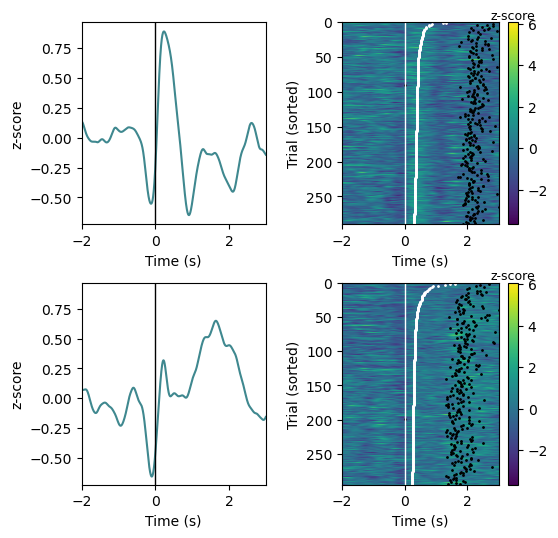

In [7]:
heat_map_and_mean(test, sort=True, error_bar_method=None, mean_across_mice=False, xlims=[-2,3])

In [8]:
print('a')

a


# Analysis looking at sidedness vs cue id for Nacc


In [2]:
mouse_id = 'SNL_photo30'
date = '20201209'

In [3]:
cue_test = SessionData('left', 'Nacc', mouse_id, date)

In [4]:
cue_test_ev = CueAlignedSidedData(cue_test)

(586, 17)
(245, 160000)
(439, 17)
(246, 160000)
(586, 17)
(4, 160000)
(439, 17)
(239, 160000)
(586, 17)
(241, 160000)
(439, 17)
(7, 160000)


In [5]:
from utils.plotting import plot_one_side

In [6]:
ipsi_low = cue_test_ev.low_cue_ipsi_data
contra_low = cue_test_ev.low_cue_contra_data
ipsi_high = cue_test_ev.high_cue_ipsi_data
contra_high = cue_test_ev.high_cue_contra_data

In [357]:
light_pink = '#FFADCD'
light_blue = '#9BCFFD'
dark_pink = '#FF478B'
dark_blue = '#1F93FF'
fig1, ax1 = plt.subplots(1,1)
time_points = decimate(ipsi_low.time_points, 10)
mean_trace = decimate(ipsi_low.mean_trace, 10)
traces = decimate(ipsi_low.sorted_traces, 10)
ax1.plot(time_points, mean_trace, lw=1.5, label='ipsi low', color=light_blue)

mean_trace = decimate(contra_low.mean_trace, 10)
traces = decimate(contra_low.sorted_traces, 10)
ax1.plot(time_points, mean_trace, lw=1.5, label='contra low', color=dark_blue)

mean_trace = decimate(ipsi_high.mean_trace, 10)
traces = decimate(ipsi_high.sorted_traces, 10)
ax1.plot(time_points, mean_trace, lw=1.5, label='ipsi high', color=dark_pink)

mean_trace = decimate(contra_high.mean_trace, 10)
traces = decimate(contra_high.sorted_traces, 10)
ax1.plot(time_points, mean_trace, lw=1.5, label='contra high', color=light_pink)
plt.legend()



In [351]:
fig, axs = plt.subplots(nrows=4, ncols=2)
plot_one_side(ipsi_low, fig, axs[0,0], axs[0, 1], error_bar_method=None, sort=True, white_dot='reward')
plot_one_side(contra_high, fig, axs[1,0], axs[1, 1], error_bar_method=None, sort=True, white_dot='reward')
plot_one_side(ipsi_high, fig, axs[2,0], axs[2, 1], error_bar_method=None, sort=True, white_dot='reward')
plot_one_side(contra_low, fig, axs[3,0], axs[3, 1], error_bar_method=None, sort=True, white_dot='reward')


In [7]:
import seaborn as sns

In [8]:
a = decimate(ipsi_low.sorted_traces, 10)

In [9]:
time_points = decimate(ipsi_low.time_points, 10)

In [ ]:
sns.heatmap(a, xticklabels=time_points)

In [14]:
a.shape

(241, 16000)

In [15]:
time_points = decimate(ipsi_low.time_points, 10)